In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

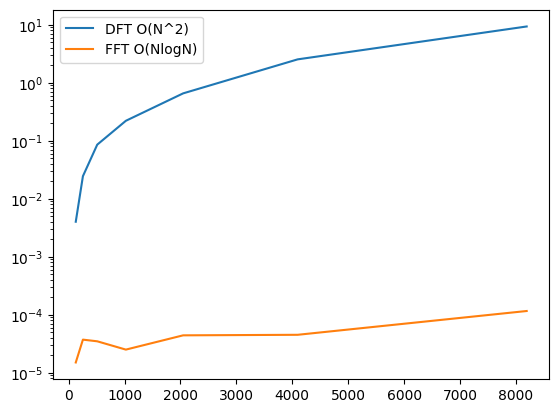

In [8]:
# ex1

def dft(N, x):
    w = np.e ** (-2 * np.pi * 1j / N)

    fourierMatrix = np.zeros((N, N), dtype=complex)

    for i in range(N):
        for j in range(N):
            fourierMatrix[i, j] = w ** (i * j)
            
    return np.dot(fourierMatrix, x)

time_dft = []
time_fft = []
if not os.path.isfile('ex1-dft.npy') or not os.path.isfile('ex1-fft.npy'):
    for N in [128, 256, 512, 1024, 2048, 4096, 8192]:
        sine = np.sin(2 * np.pi * np.linspace(0, 1, N))
        
        start_dft = time.time()
        dft(N, sine)
        end_dft = time.time()
        
        time_dft.append(end_dft - start_dft)
        
        start_fft = time.time()
        np.fft.fft(sine)
        end_fft = time.time()
        
        time_fft.append(end_fft - start_fft)

    with open('ex1-dft.npy', 'wb') as f:
            np.save(f, np.array(time_dft))

    with open('ex1-fft.npy', 'wb') as f:
            np.save(f, np.array(time_fft))
else:
    time_dft = np.load("ex1-dft.npy")
    time_fft = np.load("ex1-fft.npy")

plt.yscale('log') 
plt.plot([128, 256, 512, 1024, 2048, 4096, 8192], time_dft, label="DFT O(N^2)")
plt.plot([128, 256, 512, 1024, 2048, 4096, 8192], time_fft, label="FFT O(NlogN)")
plt.legend()

plt.savefig("ex1.pdf")
plt.show()

/var/folders/xv/w6vjg90x4pd72d9mbrnc1v6h0000gn/T/ipykernel_2460/2938215480.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


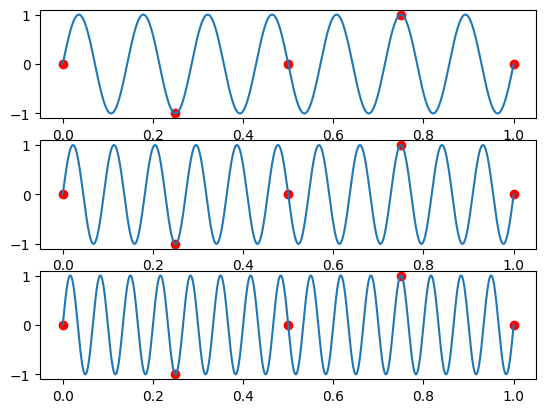

In [11]:
# ex2

# frecventa de esantionare este 4, nu 5, daca nu folosesc endpoint=False
discreteTime = np.linspace(0, 1, 5)

continuousTime = np.linspace(0, 1, 10000)

def getSine(freq, axis):
    return np.sin(2 * np.pi * freq * axis)
    
fig, axs = plt.subplots(3)


axs[0].scatter(discreteTime, getSine(7, discreteTime), color='red')
axs[0].plot(continuousTime, getSine(7, continuousTime))

axs[1].scatter(discreteTime, getSine(7, discreteTime), color='red')
axs[1].plot(continuousTime, getSine(11, continuousTime))

axs[2].scatter(discreteTime, getSine(7, discreteTime), color='red')
axs[2].plot(continuousTime, getSine(15, continuousTime))

fig.savefig("ex2.pdf")
fig.show()

/var/folders/xv/w6vjg90x4pd72d9mbrnc1v6h0000gn/T/ipykernel_2460/1032773278.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


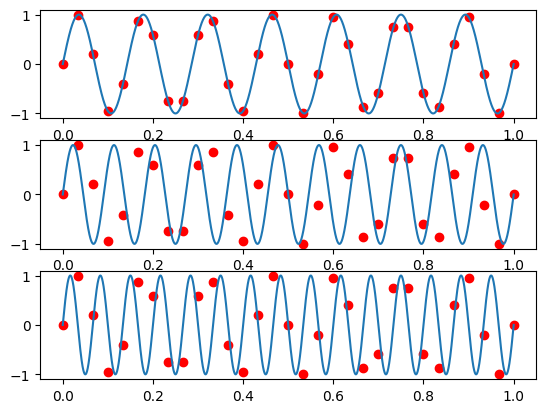

In [13]:
# ex3

# frecventa de esantionare este 30, nu 31, daca nu folosesc endpoint=False
discreteTime = np.linspace(0, 1, 31)

continuousTime = np.linspace(0, 1, 10000)

def getSine(freq, axis):
    return np.sin(2 * np.pi * freq * axis)
    
fig, axs = plt.subplots(3)


axs[0].scatter(discreteTime, getSine(7, discreteTime), color='red')
axs[0].plot(continuousTime, getSine(7, continuousTime))

axs[1].scatter(discreteTime, getSine(7, discreteTime), color='red')
axs[1].plot(continuousTime, getSine(11, continuousTime))

axs[2].scatter(discreteTime, getSine(7, discreteTime), color='red')
axs[2].plot(continuousTime, getSine(15, continuousTime))

fig.savefig("ex3.pdf")
fig.show()

In [18]:
#ex 4

# 2 * frecventa maxima = 2 * 200 = 400 Hz

In [15]:
#ex5
# Se pot distinge dupa intensitatea culorii data de magnitudine 
# pentru fiecare frecventa

48000
(246784,)


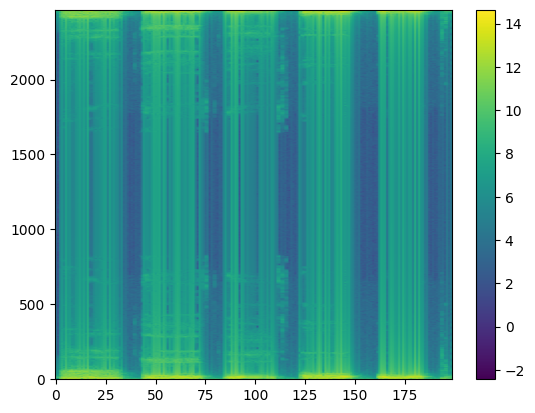

In [94]:
# ex6
from scipy.io import wavfile

# a)
samplerate, data = wavfile.read('vowels.wav')

# b)

groupSize = int(1 / 100 * len(data))
overlap = int(50 / 100 * groupSize)

groups = []
for i in range(0, len(data) - groupSize, overlap):
    groups.append(data[i : i + groupSize])
    
# c)

spectogramMatrix = []
groups = np.array(groups)
for g in groups:
    freq = np.fft.fft(g)
    # d)
    if len(spectogramMatrix) == 0:
        spectogramMatrix = np.abs(freq).T
    else:
        spectogramMatrix = np.c_[spectogramMatrix, np.abs(freq)]

# e) 
    
spectogramMatrix = np.log(spectogramMatrix)
plt.imshow(spectogramMatrix, aspect='auto', origin='lower')
plt.colorbar()
plt.savefig("ex6-spectogram.pdf")
plt.show()



In [21]:
# ex7

# 10 log ps/pz = 80

# 10 * log 90/pz = 80

# log 90 - log pz = 8
# log9 + 1 - logpz = 8
# log9 - 7 = logpz

# 10 ** (log9 - 7) = pz

# 9 * 10 ^ (- 7) = pz